In [1]:
import numpy as np
from tqdm import tqdm
from UCRL2_L import UCRL2_L, VI, plot, riverswim, UCRL2_L_support, UCRL2_L_SuppSize


nS = 6
env = riverswim(nS, ergodic=True)
delta = 0.05

# Set the time horizon:
T = 4 * 10**5
nb_Replicates = 50

# Set the learning agents:
UCRL2L = UCRL2_L(nS, 2, delta)
UCRL2L_supp_size = UCRL2_L_SuppSize(nS, 2, delta, support=env.support)
UCRL2L_supp = UCRL2_L_support(nS, 2, delta, support=env.support)

# Set the variables used for plotting.
cumregret_UCRL2L = [[0] for _ in range(nb_Replicates)]
cumrewards_UCRL2L = [[0] for _ in range(nb_Replicates)]

cumregret_UCRL2L_supp_size = [[0] for _ in range(nb_Replicates)]
cumrewards_UCRL2L_supp_size = [[0] for _ in range(nb_Replicates)]

cumregret_UCRL2L_supp = [[0] for _ in range(nb_Replicates)]
cumrewards_UCRL2L_supp = [[0] for _ in range(nb_Replicates)]

# Estimate the optimal gain.
print(
    "Estimating the optimal gain...",
)
_, _, _, gstar = VI(env, 10**6, 10 ** (-6))
episode_counts = np.zeros((nb_Replicates, 3))
# Run the experiments:
print("Running experiments...")
for i in tqdm(range(nb_Replicates)):
    # Running an instance of UCRL2-L:
    env.reset()    
    UCRL2L.reset(env.s)    
    reward = 0
    new_s = env.s
    for _ in range(T):
        action, _ = UCRL2L.play(new_s, reward)
        new_s, reward = env.step(action)
        cumregret_UCRL2L[i].append(cumregret_UCRL2L[i][-1] + gstar - reward)
        cumrewards_UCRL2L[i].append(cumrewards_UCRL2L[i][-1] + reward)
        
    episode_counts[i, 0] = UCRL2L.episode_count
        
    env.reset()    
    UCRL2L_supp.reset(env.s)
    reward = 0
    new_s = env.s
    for _ in range(T):
        action, _ = UCRL2L_supp.play(new_s, reward)
        new_s, reward = env.step(action)
        cumregret_UCRL2L_supp[i].append(cumregret_UCRL2L_supp[i][-1] + gstar - reward)
        cumrewards_UCRL2L_supp[i].append(cumrewards_UCRL2L_supp[i][-1] + reward)
        
    episode_counts[i, 1] = UCRL2L_supp.episode_count
    
    env.reset()    
    UCRL2L_supp_size.reset(env.s)
    reward = 0
    new_s = env.s
    for _ in range(T):
        action, _ = UCRL2L_supp_size.play(new_s, reward)
        new_s, reward = env.step(action)
        cumregret_UCRL2L_supp_size[i].append(cumregret_UCRL2L_supp_size[i][-1] + gstar - reward)
        cumrewards_UCRL2L_supp_size[i].append(cumrewards_UCRL2L_supp_size[i][-1] + reward)
        
    episode_counts[i, 2] = UCRL2L_supp_size.episode_count

Estimating the optimal gain...
Running experiments...


  0%|          | 0/50 [00:00<?, ?it/s]/home/tokereines/repositories/10_ORel/week8/UCRL2_L.py:353: RuntimeWarning: divide by zero encountered in log
  self.confP[s, a] = np.sqrt((2 * (1 + 1 / n) * np.log(np.sqrt(n + 1) * (2**(len(self.support[s][a])) - 2) / d)) / n)
/home/tokereines/repositories/10_ORel/week8/UCRL2_L.py:353: RuntimeWarning: invalid value encountered in sqrt
  self.confP[s, a] = np.sqrt((2 * (1 + 1 / n) * np.log(np.sqrt(n + 1) * (2**(len(self.support[s][a])) - 2) / d)) / n)
 28%|██▊       | 14/50 [04:00<10:23, 17.32s/it]

No convergence in EVI after:  200  steps!


 48%|████▊     | 24/50 [06:55<07:39, 17.66s/it]

No convergence in EVI after:  200  steps!
No convergence in EVI after:  200  steps!
No convergence in EVI after:  200  steps!


 56%|█████▌    | 28/50 [08:01<06:02, 16.48s/it]

No convergence in EVI after:  200  steps!


 70%|███████   | 35/50 [09:55<04:05, 16.39s/it]

No convergence in EVI after:  200  steps!


 86%|████████▌ | 43/50 [12:07<01:54, 16.41s/it]

No convergence in EVI after:  200  steps!


100%|██████████| 50/50 [14:01<00:00, 16.83s/it]



Plotting...


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Done!


<Figure size 640x480 with 0 Axes>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


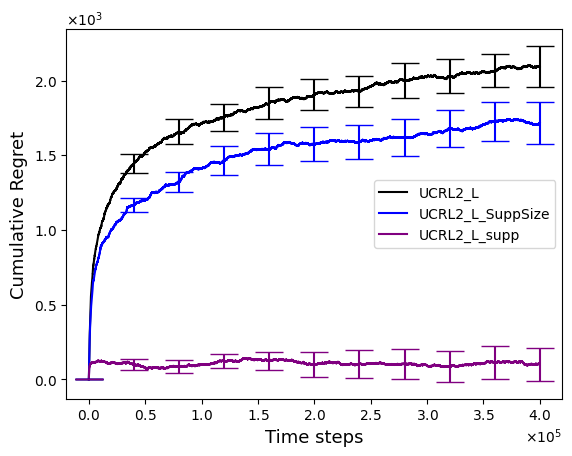

In [2]:
# Plot and finish.
print("\nPlotting...")
plot(
    [cumregret_UCRL2L, cumregret_UCRL2L_supp_size, cumregret_UCRL2L_supp],
    ["UCRL2_L", "UCRL2_L_SuppSize", "UCRL2_L_supp"],
    y_label="Cumulative Regret",
    exp_name="cumulative_regret",
    q="3"
)

print("Done!")